# Presentation of the results

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import json
import re
import geopandas as gpd
from collections import Counter
import squarify
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, widgets, Button, HBox, VBox, Output
import time

from IPython.display import display
from itertools import combinations

import nbformat
from IPython.core.interactiveshell import InteractiveShell

# 1. Data exploration

> Our project aims to basically determine the stereotypical character persona evolution over time. Before diving into our specific research questions, we recognize the importance of thoroughly understanding the data that we used. This initial exploratory phase is crucial and needed for several reasons:
> - Data Familiarization: By closely examining the dataset, we can gain a comprehensive understanding of its structure, content, and potential limitations.
> - Quality Assessment: This preliminary analysis allows us to identify any data quality issues, such as missing values, outliers, or inconsistencies that may impact our subsequent analyses.
> - Methodology Refinement: Insights gained from this initial exploration will help us determine the most appropriate analytical methods and techniques for our main research questions.
> - Hypothesis Generation: This process may lead to the formulation of additional hypotheses or research questions we hadn't initially considered.

> In this first part of the notebook, we present our initial data exploration and the first manipulations of datasets that are needed for the rest of the project. Our goal is to provide a solid foundation for the more focused analyses that will follow, ensuring that our subsequent investigations are built on a good understanding of the dataset's characteristics. By starting with this comprehensive and global overview, we aim to enhance the rigor and reliability of our final results, as well as potentially uncover valuable insights that might otherwise have been overlooked.

In [2]:
import nbformat
from IPython.core.interactiveshell import InteractiveShell

# Load the notebook utils.ipynb
with open('/home/sara/Dropbox/epfl/master/MA1/ADA/ada-2024-project-analyticaldementialavengers/src/scripts/utils.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

# Create an instance of InteractiveShell
shell = InteractiveShell.instance()

# Execute the notebook utils.ipynb
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

## *1.2 Preparation and transformation of the data*

> In this initial section, before diving into our main analysis, it's crucial to properly prepare and understand our dataset that form the foundation of our study. This preliminary phase involves several key steps:
> 1. Data Loading: We'll begin by opening our data files and adding headers based on the *Readme* of thE *CMU Movie Summary Corpus* study (http://www.cs.cmu.edu/~ark/personas/).
> 2. Data Size Evaluation: Understanding the size of our datasets is essential for determining appropriate processing methods and potential computational constraints.
> 3. Data Merging: We'll combine two relevant dataframes (`characters_df` and `movies_df`) to create a more comprehensive dataset and to facilitate the statistical anaylsis.
> 4. Separation of data into decades: After merging, we'll separate the dataset into decades as we want to study an evolution over time.

### *1.2.1 Adding datasets headers*

In [3]:
# Characers file
characters_df = pd.read_csv('data/character.metadata.tsv', sep='\t', header=None)
characters_df.columns = ['Wikipedia_movie_ID', 'Freebase_Movie_ID', 'Movie_release_date', 'Character_name', 'Actor_date_of_birth', 'Actor_gender', 'Actor_height','Actor_ethnicity',
                         'Actor_name', 'Actor_age_at_movie_release','Freebase_character/actor_map_ID','Freebase_character_ID','Freebase_actor_ID']
characters_df.head()
#characters_df.to_csv('/home/sara/Dropbox/epfl/master/MA1/ADA/ada-2024-project-analyticaldementialavengers/data/character.metadata.csv', index=False)

# Movies file
movies_df = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None)
movies_df.columns = ['Wikipedia_movie_ID', 'Freebase_Movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime', 'Movie_languages','Movie_countries',
                         'Movie_genres']
#movies_df.to_csv('/home/sara/Dropbox/epfl/master/MA1/ADA/ada-2024-project-analyticaldementialavengers/data/movie.metadata.csv', index=False)

# Name clusters file
path_name_cluster = 'data/name.clusters.txt'
name_cluster_df = pd.read_csv(path_name_cluster, delimiter='\t', header=None)
name_cluster_df.columns = ['unique_character_name', 'freebase_actor_id']
#name_cluster_df.to_csv('/home/sara/Dropbox/epfl/master/MA1/ADA/ada-2024-project-analyticaldementialavengers/data/name.clusters.csv', index=False)

# Plot summary file
# Read the txt file by specifying the delimiter (here, a tabulation)
path_plot = 'data/plot_summaries.txt'
plot_summary_df = pd.read_csv(path_plot, delimiter='\t', header=None)
plot_summary_df.columns = ['movie_id', 'plot_summary']
#plot_summary_df.to_csv('/home/sara/Dropbox/epfl/master/MA1/ADA/ada-2024-project-analyticaldementialavengers/data/plot_summaries.csv', index=False)

# TV tropes cluster
path_name_cluster = 'data/tvtropes.clusters.txt'
tv_tropes_df = pd.read_csv(path_name_cluster, delimiter='\t', header=None)
tv_tropes_df.columns = ['character_types', 'ID_field']
#tv_tropes_df.to_csv('/home/sara/Dropbox/epfl/master/MA1/ADA/ada-2024-project-analyticaldementialavengers/data/tvtropes.clusters.csv', index=False)

In [4]:
tv_tropes_df.head()

character_types                                           ID_field
0  absent_minded_professor  {"char": "Professor Philip Brainard", "movie":...
1  absent_minded_professor  {"char": "Professor Keenbean", "movie": "Richi...
2  absent_minded_professor  {"char": "Dr. Reinhardt Lane", "movie": "The S...
3  absent_minded_professor  {"char": "Dr. Harold Medford", "movie": "Them!...
4  absent_minded_professor  {"char": "Daniel Jackson", "movie": "Stargate"...

### *1.2.2 Size of the different dataframes*

In [5]:
# Size of the characters_df
characters_df_size=len(characters_df)
print(f'The size of the characters_df is: {characters_df_size}')

# Size of the movies_df
movies_df_size=len(movies_df)
print(f'The size of the movies_df is: {movies_df_size}')

# Size of the name_cluster_df
name_cluster_df_size=len(name_cluster_df)
print(f'The size of the name_cluster_df is: {name_cluster_df_size}')

# Size of the plot summary
plot_summary_df_size=len(plot_summary_df)
print(f'The size of the plot_summary_df is: {plot_summary_df_size}')

# Size of the tv_tropes_df
tv_tropes_df_size=len(tv_tropes_df)
print(f'The size of the tv_tropes_df is: {tv_tropes_df_size}')

The size of the characters_df is: 450669
The size of the movies_df is: 81741
The size of the name_cluster_df is: 2666
The size of the plot_summary_df is: 42303
The size of the tv_tropes_df is: 501


### *1.2.3 Merging of `characters_df` and `moves_df`*

In [6]:
merged_df = pd.merge(characters_df, movies_df, on=['Wikipedia_movie_ID', 'Freebase_Movie_ID', 'Movie_release_date'])
#merged_df.to_csv('/home/sara/Dropbox/epfl/master/MA1/ADA/ada-2024-project-analyticaldementialavengers/data/merged.characters.movies.csv', index=False)

### *1.2.4 Separation of the `merged_df` into decades*

In [7]:
# Conversion of the 'Movie_release_date' column to datetime format
merged_df['Movie_release_date'] = pd.to_datetime(merged_df['Movie_release_date'], errors='coerce')

# Count the number of films without release date
films_without_release_date = merged_df['Movie_release_date'].isna().sum()

# Display the number of films without release date
print(f"Number of movies without release date : {films_without_release_date}, which is {round(films_without_release_date/len(merged_df)*100, 2)}% of the dataset")

# Count the number of films without associated genres
films_without_genre = merged_df['Movie_genres'].isna().sum()

# Display the number of films without associated genres
print(f"Number of movies without genre : {films_without_genre}, which is {round(films_without_genre/len(merged_df)*100, 2)}% of the dataset")

Number of movies without release date : 176797, which is 39.23% of the dataset
Number of movies without genre : 0, which is 0.0% of the dataset


> As 39.23% of the dataset has no release date, we cannot simply discard it. We decide to use the average of the release years of films in the same genre, given that all the films in the dataset have a genre or a combination of genres. For the combination of genres, we take the average of the averages for each genre.

In [8]:
# Creation of a new column called "genre_list" in movies_df to have a list of all genres of a movie
movies_df['genre_list'] = movies_df['Movie_genres'].astype(str).apply(extract_string)

# Creation of a new column called "genre_list" in merged_df to have a list of all genres of a movie
movies_df['genre_list'] = movies_df['Movie_genres'].astype(str).apply(extract_string)
merged_df['genre_list'] = merged_df['Movie_genres'].astype(str).apply(extract_string)

# Conversion of dates to years (to unfiformize the format)
merged_df['Movie_release_year'] = merged_df['Movie_release_date'].dt.year

# Calculate the mean release year by genre
mean_release_year_by_genre = merged_df.explode('genre_list').groupby('genre_list')['Movie_release_year'].mean()

# Estimation of the release year of the films without release date
merged_df['Estimated_release_year'] = merged_df.apply(estimate_release_year, axis=1)

# Vérification
films_without_release_date = merged_df['Estimated_release_year'].isna().sum()
print(f"Number of movies without release date : {films_without_release_date} movies, which is {round(films_without_release_date/len(merged_df)*100, 2)}% of the dataset")

Number of movies without release date : 2879 movies, which is 0.64% of the dataset


> After using the mean release date of movies with similar genres or the mean of the means for genres combination, only 0.64% of the dataset, which corresponds to 2879 movies, still don't have release date. This is acceptable to work with it. What could explain why some movies still don't have release date is due to the used method. Inded, the mean meathod is not applicable on movies that have a unique genre and no release date, making it impossible to calculate the average.

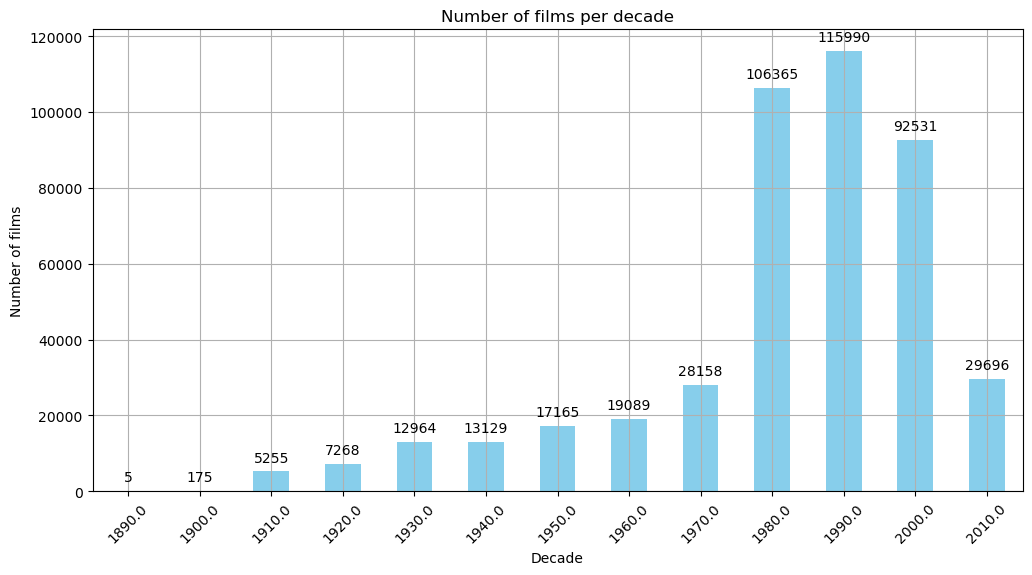

In [9]:
# Creation of a new column 'Decade' to group the movies by decade
merged_df['Decade'] = (merged_df['Estimated_release_year'] // 10) * 10

# Count the number of films per decade
films_per_decade = merged_df['Decade'].value_counts().sort_index()

# Graphical visualization of the number of films per decade
plt.figure(figsize=(12, 6))
ax = films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of films per decade')
plt.xlabel('Decade')
plt.ylabel('Number of films')
plt.xticks(rotation=45)
plt.grid(True)
# Adding the number of films above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# Saving the cleaned merged_df
#movies_df.to_csv('/home/sara/Dropbox/epfl/master/MA1/ADA/ada-2024-project-analyticaldementialavengers/data/cleaned.merged.csv', index=False)

In [10]:
# Calculate the number of films per decade
films_per_decade = merged_df['Decade'].value_counts().sort_index()

# Calculate descriptive statistics
films_per_decade_stats = films_per_decade.describe()

# Print the descriptive statistics
print("Descriptive statistics on the number of movies per decades:")
print(films_per_decade_stats)

Descriptive statistics on the number of movies per decades:
count        13.000000
mean      34445.384615
std       41492.507829
min           5.000000
25%        7268.000000
50%       17165.000000
75%       29696.000000
max      115990.000000
Name: count, dtype: float64


>The graphical results show that the distribution of films by decade is clearly not uniform. On average, 34,445 films are produced per decade and, as the standard deviation is 41,492, it is clear that there is a wide variation in the number of films produced per decade, which means that we need to take this into account in our project for the significance of the results. As the decades 1890-1900 (5 films) and 1900-1910 (175 films) contain very few films, we prefer not to work with the data for these decades as the number of films is not significant and probably not very representative.

## *1.2 Preliminary Data exploration*

> Having prepared our dataset, we now turn to a broad exploration of its contents. This section will provide a global overview of the key variables and their distributions across our datasets. Our goal here is to gain a general understanding of the data landscape,even if the analyses carried out are not directly related to our research questions. It is simply a question of understanding the data we are playing with.

### *1.2.1 Repartition of the plot summary*

> Given that plot summaries could be an excellent way of determining the characteristics of our character personas, it is important to understand what this dataset contains and in what proportion.

count    42303.000000
mean       310.740468
std        318.338286
min          4.000000
25%         87.000000
50%        187.000000
75%        454.000000
max       4929.000000
Name: word_count, dtype: float64


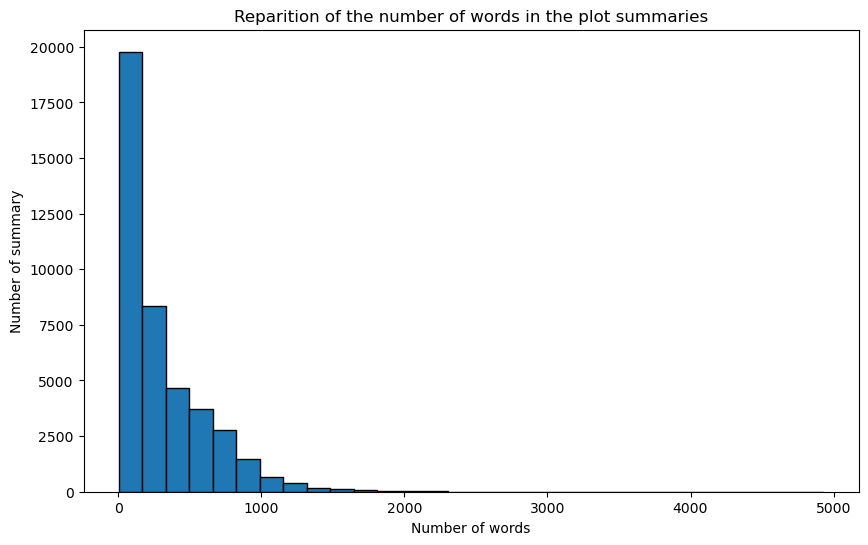

In [11]:
# Add a new column with the number of words for each summary
plot_summary_df['word_count'] = plot_summary_df['plot_summary'].apply(lambda x: len(str(x).split()))

# Calculate the descriptive statistics
plot_summary_stats = plot_summary_df['word_count'].describe()
print(plot_summary_stats)

# Create a new column with the number of words for each summary
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(plot_summary_df['word_count'], bins=30, edgecolor='black')
plt.title('Reparition of the number of words in the plot summaries')
plt.xlabel('Number of words')
plt.ylabel('Number of summary')
plt.show()

In [12]:
# Identification of the first peak limits
# As the biggest peak is in the first bins, we will consider the first two bins as the limits of the first peak
first_peak_start = bins[0]
first_peak_end = bins[1]

# Counting of the number of movies in the first peak
first_peak_count = plot_summary_df[(plot_summary_df['word_count'] >= first_peak_start) & (plot_summary_df['word_count'] < first_peak_end)].shape[0]
percentage_first_peak = first_peak_count / plot_summary_df_size * 100
print(f"Number of movies in the first peak : {percentage_first_peak}% are between {first_peak_start} and {first_peak_end} words")

print(f"Number of movies in the first peak : {first_peak_count}")

Number of movies in the first peak : 46.75554925182611% are between 4.0 and 168.16666666666666 words
Number of movies in the first peak : 19779


> As the median is 187 and the mean is 310, we don't have a relative symmetric distribution in the length of the plot summary. As the mean is bigger than the median, we maybe have some summaries that are particularly bigger and that make the mean up. This is also correlated by the standard deviation of 318. This wide variability in plot summary length should be taken into account in the analyses if this database is used. Graphically, the histogram shows a big peak, indicating that most of plot summaries have a similar length. More precisely, 46.75% of the movies have a summary between 4 to 168 words. 

### *1.2.2 Repartition of movie production per country*

> The origin of the films is also an important factor in understanding just how diverse the database is from a global perspective.

/opt/anaconda3/lib/python3.11/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 7.
  self.bins = quantile(y, k=k)


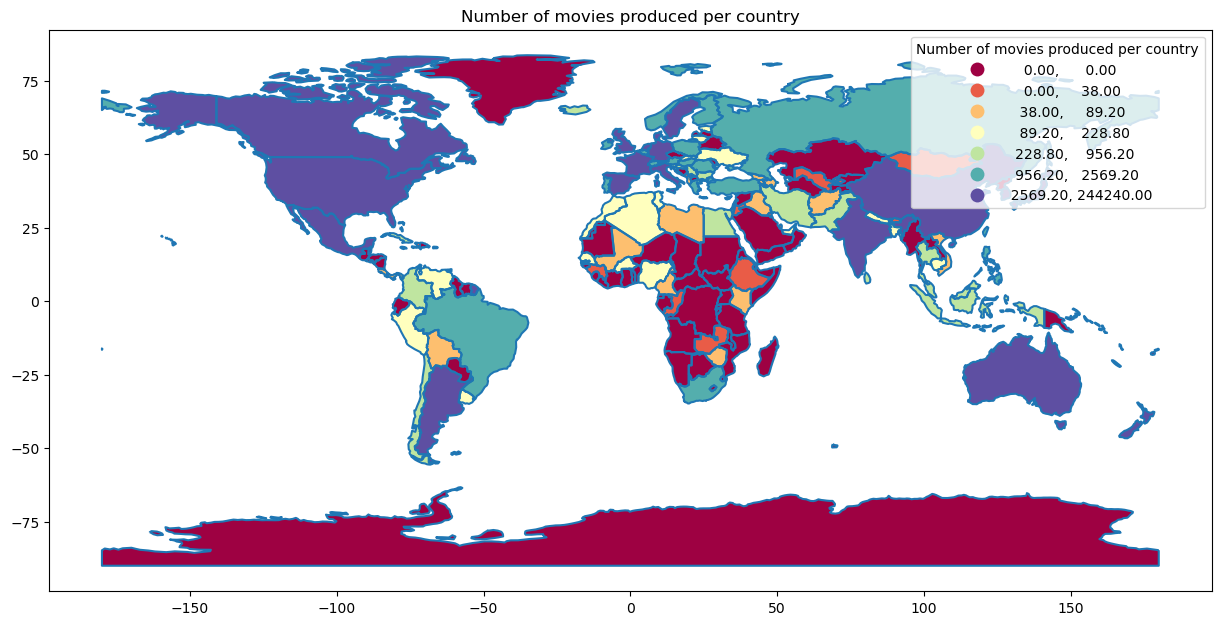

In [13]:
# Creation of a new column called "country_list" in movies_df to have a list of all countries of a movie
merged_df['country_list']=merged_df['Movie_countries'].astype(str).apply(extract_string)

# Transformation of the country list into individual rows
exploded_countries = merged_df.explode('country_list')

# Counting the number of movies per country
country_counts = exploded_countries['country_list'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Sorting the countries by number of movies
country_counts = country_counts.sort_values(by='count', ascending=False)

# Loading the shapefile of the world
shapefile_path = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Fusion of the movie data with the shapefile data
world = world.merge(country_counts, how='left', left_on='NAME', right_on='country')

# Fill the NaN values with 0
world['count'] = world['count'].fillna(0)

# Adjusting the number of classes for the choropleth map
unique_counts = world['count'].nunique()
k = min(10, unique_counts)

# Creation of the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='count', ax=ax, legend=True,
           legend_kwds={'title': "Number of movies produced per country"},
           cmap='Spectral', scheme='quantiles', k=k)
plt.title('Number of movies produced per country')
plt.show()

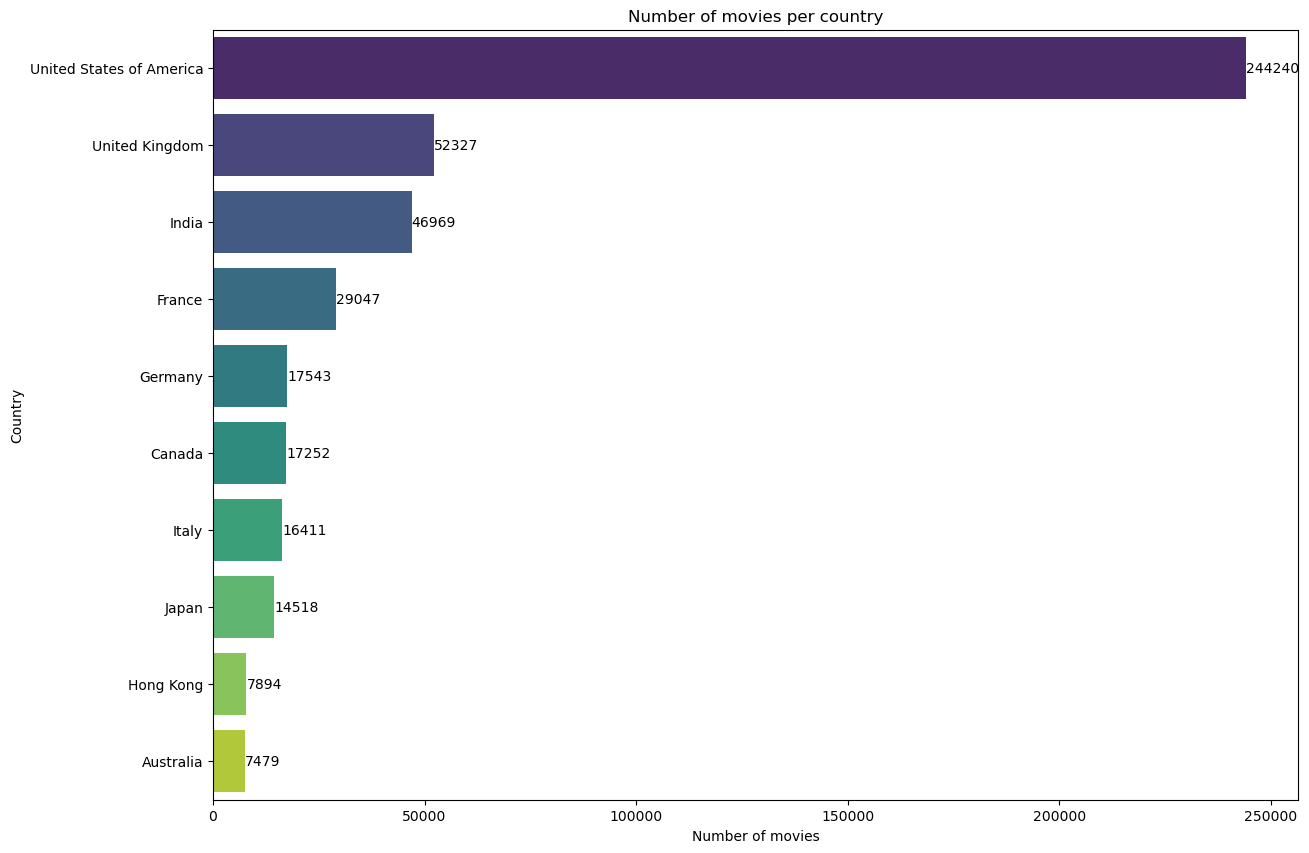

In [14]:
# Limitation to the 20 most represented countries
top_countries = country_counts.head(10)

# Creation of a barplot
plt.figure(figsize=(14, 10))
sns.barplot(x='count', y='country', data=top_countries, palette='viridis', hue='country', dodge=False, legend=False)
plt.title('Number of movies per country')
plt.xlabel('Number of movies')
plt.ylabel('Country')
# Adding the number of movies on the right of the bars
for index, value in enumerate(top_countries['count']):
    plt.text(value, index, str(value), va='center')
plt.show()

In [15]:
# Calculer des statistiques descriptives sur le nombre de films produits par pays
country_stats = country_counts['count'].describe()

# Imprimer les statistiques descriptives
print("Descriptive statistics on the number of movies produced per country:")
print(country_stats)

# Afficher les pays avec la production de films la plus faible
bottom_countries = country_counts.tail(10)
print("\nCountries with the lowest movies production :")
print(bottom_countries)

Descriptive statistics on the number of movies produced per country:
count       141.000000
mean       3862.624113
std       21510.167992
min           1.000000
25%          48.000000
50%         179.000000
75%        1243.000000
max      244240.000000
Name: count, dtype: float64

Countries with the lowest movies production :
                    country  count
131      Malayalam Language     10
132         German Language      9
133            Ukranian SSR      8
134                   Qatar      7
135                   Crime      6
136       Republic of China      5
137                   Congo      4
138                   Macau      3
139                  Guinea      3
140  Soviet occupation zone      1


> In terms of geographical trends, it is clear that the United States is the leading producer of films in this database, with a maximum of 34,408 films produced, compared with a minimum of 1 in countries such as the Republic of China. From a continental perspective, Africa has the fewest films in the database. This could potentially be a bias to be taken into account in our analysis, as the characters persona will not be representative on a global scale.

### *1.2.3 TV tropes examintation*

One of the databases contains TV tropes, which can also be very useful for our research questions, but we also need to understand what is in this dataset.

In [16]:
# Plotting the number of occurences of each TV trope
plt.figure(figsize=(300, 150))
plt.bar(tv_tropes_df['character_types'].value_counts().index, tv_tropes_df['character_types'].value_counts().values, edgecolor='black')
plt.title('Distribution of TV tropes occurencies', fontsize = 100)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(fontsize = 50)
plt.xlabel('TV trope', fontsize = 50)
plt.ylabel('Number of time this TV trop appears')
plt.show()

In [17]:
# Convert the "Movie release date" column to datetime and extract the year (as the format of year is not uniform through the column)
merged_df['Year'] = pd.to_datetime(merged_df['Movie_release_date'], errors='coerce').dt.year

# Filter strings that can be converted to dictionaries
tv_tropes_df = tv_tropes_df[tv_tropes_df['ID_field'].apply(is_dict_string)]

# Convert strings to dictionaries
tv_tropes_df['ID_field'] = tv_tropes_df['ID_field'].apply(ast.literal_eval)

# Flatten the ID_field column using pd.json_normalize and concatenate the resulting DataFrame with the tv_tropes_df DataFrame
tv_tropes_df = pd.concat([tv_tropes_df, pd.json_normalize(tv_tropes_df['ID_field'])], axis=1)

# Perform an inner join between the tv_tropes_df DataFrame and the merged_df DataFrame using the movie name
tv_tropes_df = pd.merge(tv_tropes_df, merged_df, left_on='movie', right_on='Movie_name', how='inner')

# Creation of a new dataframe containing only the character types and the years when they appear and also drop the rows that contain NaN values on column year
tv_tropes_dates = tv_tropes_df[['character_types', 'Year']].dropna(subset = ['Year'])

# Selection of only the first appearance of a character type 
tv_tropes_dates = tv_tropes_dates.loc[tv_tropes_dates.groupby('character_types')['Year'].idxmin()]

# Display the first appearance of each character type
plt.figure(figsize=(200, 50))
plt.bar(tv_tropes_dates['Year'].value_counts().sort_index().index, tv_tropes_dates['Year'].value_counts().sort_index().values, edgecolor='black')
plt.title('Distribution of TV tropes ', fontsize = 70)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(fontsize = 50)
plt.xlabel('TV trope', fontsize = 50)
plt.ylabel('Number of time this TV trop appears', fontsize = 50)
plt.show()

In [18]:
# Count the number of unique TV tropes
unique_tv_tropes_count = tv_tropes_df['character_types'].nunique()
print(f"Nombre de TV tropes uniques : {unique_tv_tropes_count}")

Nombre de TV tropes uniques : 72


> The results of the TV tropes analysis are somewhat surprising. Out of the same database of films as ours, only 72 unique TV tropes were identified, and these TV tropes are not evenly distributed as a function of time. If we want to use TV tropes for our research questions, we feel it is important to repeat the process of identifying these TV tropes using a method that has yet to be determined.

## *1.3 Interesting descriptive statistics*

> Building on our initial exploration, this section dives deeper into specific aspects of our data that are particularly relevant to our research questions. We'll examine various descriptive statistics and conduct targeted analyses on factors such as temporal distribution of characters, gender representation, genre analysis and ethnicity proportion. These analyses will provide crucial insights into the characteristics of our dataset and lay the groundwork for addressing our main research questions about character persona evolution.

### *1.3.1 Short temporal anaylsis of characters*

> Since our research questions concern characters, we need to know how many there are and how they are distributed over time. For the sake of visibility, we have chosen to show the results graphically only every other year.

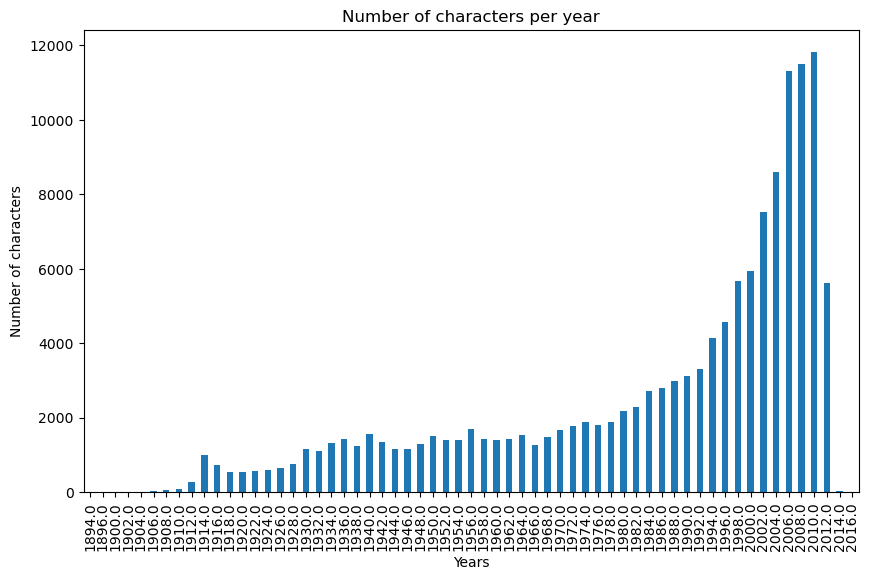

In [19]:
# Temporal reparition of characters

# Convert the "Movie release date" column to datetime and extract the year (as the format of year is not uniform through the column)
characters_df['year'] = pd.to_datetime(characters_df['Movie_release_date'], errors='coerce').dt.year

# Group by year and count the number of characters per year
characters_per_year = characters_df.groupby('year').size()

# Filter the years to keep only those that are multiples of 2
characters_per_year = characters_per_year[characters_per_year.index % 2 == 0]

# Plot the number of movies per year
plt.figure(figsize=(10, 6))
characters_per_year.plot(kind='bar')
plt.title('Number of characters per year')
plt.xlabel('Years')
plt.ylabel('Number of characters')
plt.show()

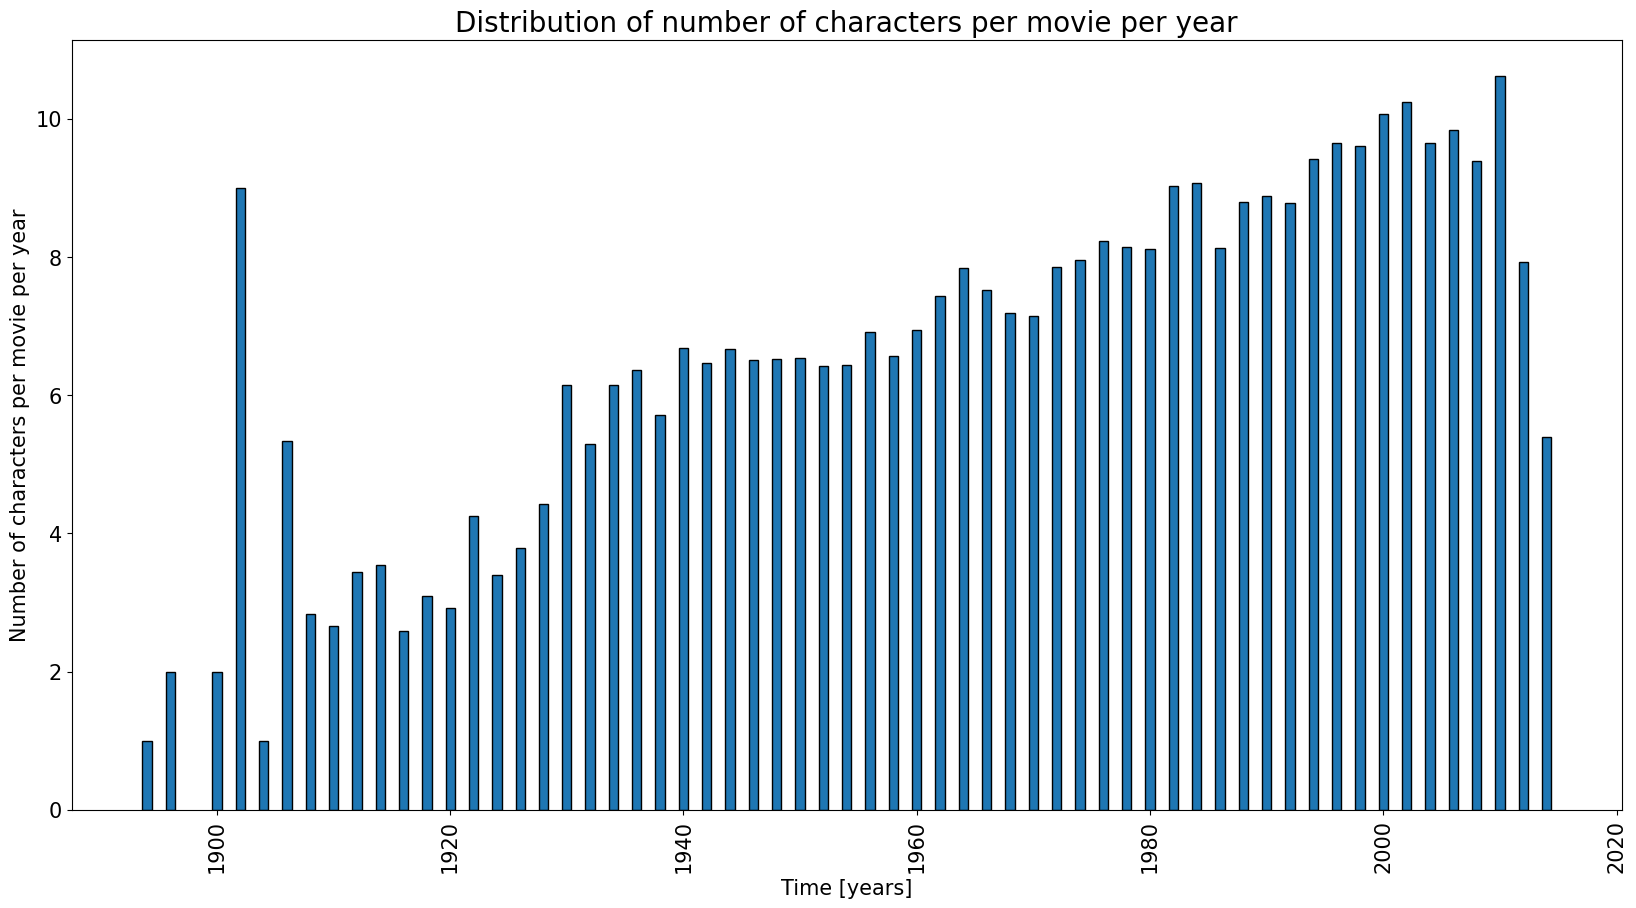

In [20]:
# Temporal repartition of characters per movie

# Determination of the number of characters per movie using the groupby function
characters_per_movie = characters_df.groupby(['Wikipedia_movie_ID', 'year']).size().reset_index(name='character_count')

# Taking the mean of character per year 
mean_characters = characters_per_movie.groupby(['year'])['character_count'].mean().reset_index()

# Filter the years to keep only those that are multiples of 2
mean_characters = mean_characters[mean_characters.index % 2 == 0]

# Display the mean number of characters per movie per year
plt.figure(figsize=(20, 10))
plt.bar(mean_characters['year'], mean_characters['character_count'].values, edgecolor='black')
plt.title('Distribution of number of characters per movie per year', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time [years]', fontsize=15)
plt.ylabel('Number of characters per movie per year', fontsize=15)
plt.show()

> The distribution of characters over time is clearly exponential, as is the distribution of the number of characters per film and per year, although less clearly. As already noted in section 1.2.4, the decades 1890-1900 and 1900-1910 have few characters and therefore few characters per film and per year.

### *1.3.2 Genre analysis*

> Analysing the male-female ratio is also a good indicator for analysing characters. 

In [21]:
# Count the number of films without data about the actor gender
movies_without_gender = merged_df['Actor_gender'].isna().sum()
print(f"Number of movies without data in Movie_gender : {movies_without_gender} which is {round(movies_without_gender/len(merged_df)*100, 2)}% of dataset")

Number of movies without data in Movie_gender : 45609 which is 10.12% of dataset


> We estimated that 10.12% of the dataset not containing a gender could still be used. In order to have a temporal evolution of the evolution of the male-female proportion, we plotted this representation as a function of the decades (with two types of graph, one of which is interactive, which could be interesting for part P3 of the project).

In [22]:
# Prepare the data for each decade
decade_gender_counts = merged_df.groupby(['Decade', 'Actor_gender']).size().reset_index(name='count')

# Creation of a graph with plotly
fig = px.bar(decade_gender_counts, x='Decade', y='count', color='Actor_gender', barmode='stack',
             labels={'count': 'Number of movies', 'Decade': 'Decade', 'Actor_gender': 'Genre'},
             title='Repartition men-women for the decades')
fig.show()

In [23]:
# Creation of frames for each decade
frames = []
for decade in decade_gender_counts['Decade'].unique():
    frame_data = decade_gender_counts[decade_gender_counts['Decade'] == decade]
    frame = go.Frame(data=[go.Pie(labels=frame_data['Actor_gender'], values=frame_data['count'])],
                     name=str(decade))
    frames.append(frame)

# Creation of the initial graph
initial_data = decade_gender_counts[decade_gender_counts['Decade'] == decade_gender_counts['Decade'].min()]
fig = go.Figure(data=[go.Pie(labels=initial_data['Actor_gender'], values=initial_data['count'])])

# Adding the frames to the graph
fig.frames = frames

# Adding the play/pause button
fig.update_layout(
    title='Proportion of men and women per decade',
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Adding the timeline
fig.update_layout(
    sliders=[{
        'steps': [
            {
                'args': [[str(decade)], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 300}}],
                'label': str(decade),
                'method': 'animate'
            } for decade in decade_gender_counts['Decade'].unique()
        ],
        'transition': {'duration': 300},
        'x': 0.1,
        'len': 0.9,
        'xanchor': 'left',
        'y': -0.1,
        'currentvalue': {
            'font': {'size': 20},
            'prefix': 'Decade:',
            'visible': True,
            'xanchor': 'right'
        },
        'tickcolor': 'white'
    }]
)

# Afficher le graphique
fig.show()

> Not surprisingly, the proportion of men and women has not changed much over the decades. Women make up a third of the cast. This should also be taken into account when analysing the characters.

### *1.3.3 Gender analysis*

> Gender analysis is a potentially very interesting indicator for analysing characters. It is highly likely that new characters will emerge from new genres. It's also likely that there will be crossovers between characters from different genres. Understanding which genres are present in the database, how they evolve and how they interact is important.

> We have decided to plot the 10 most numerous genres by decade in order to get a representative view. We also plotted a more interactive graph (also with a view to perhaps using it for the P3 milestone of the project). In order to have a gender analysis linked to genres, we have also plotted the evolution of men and women by gender and by decade.

/tmp/ipykernel_9709/2503974420.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



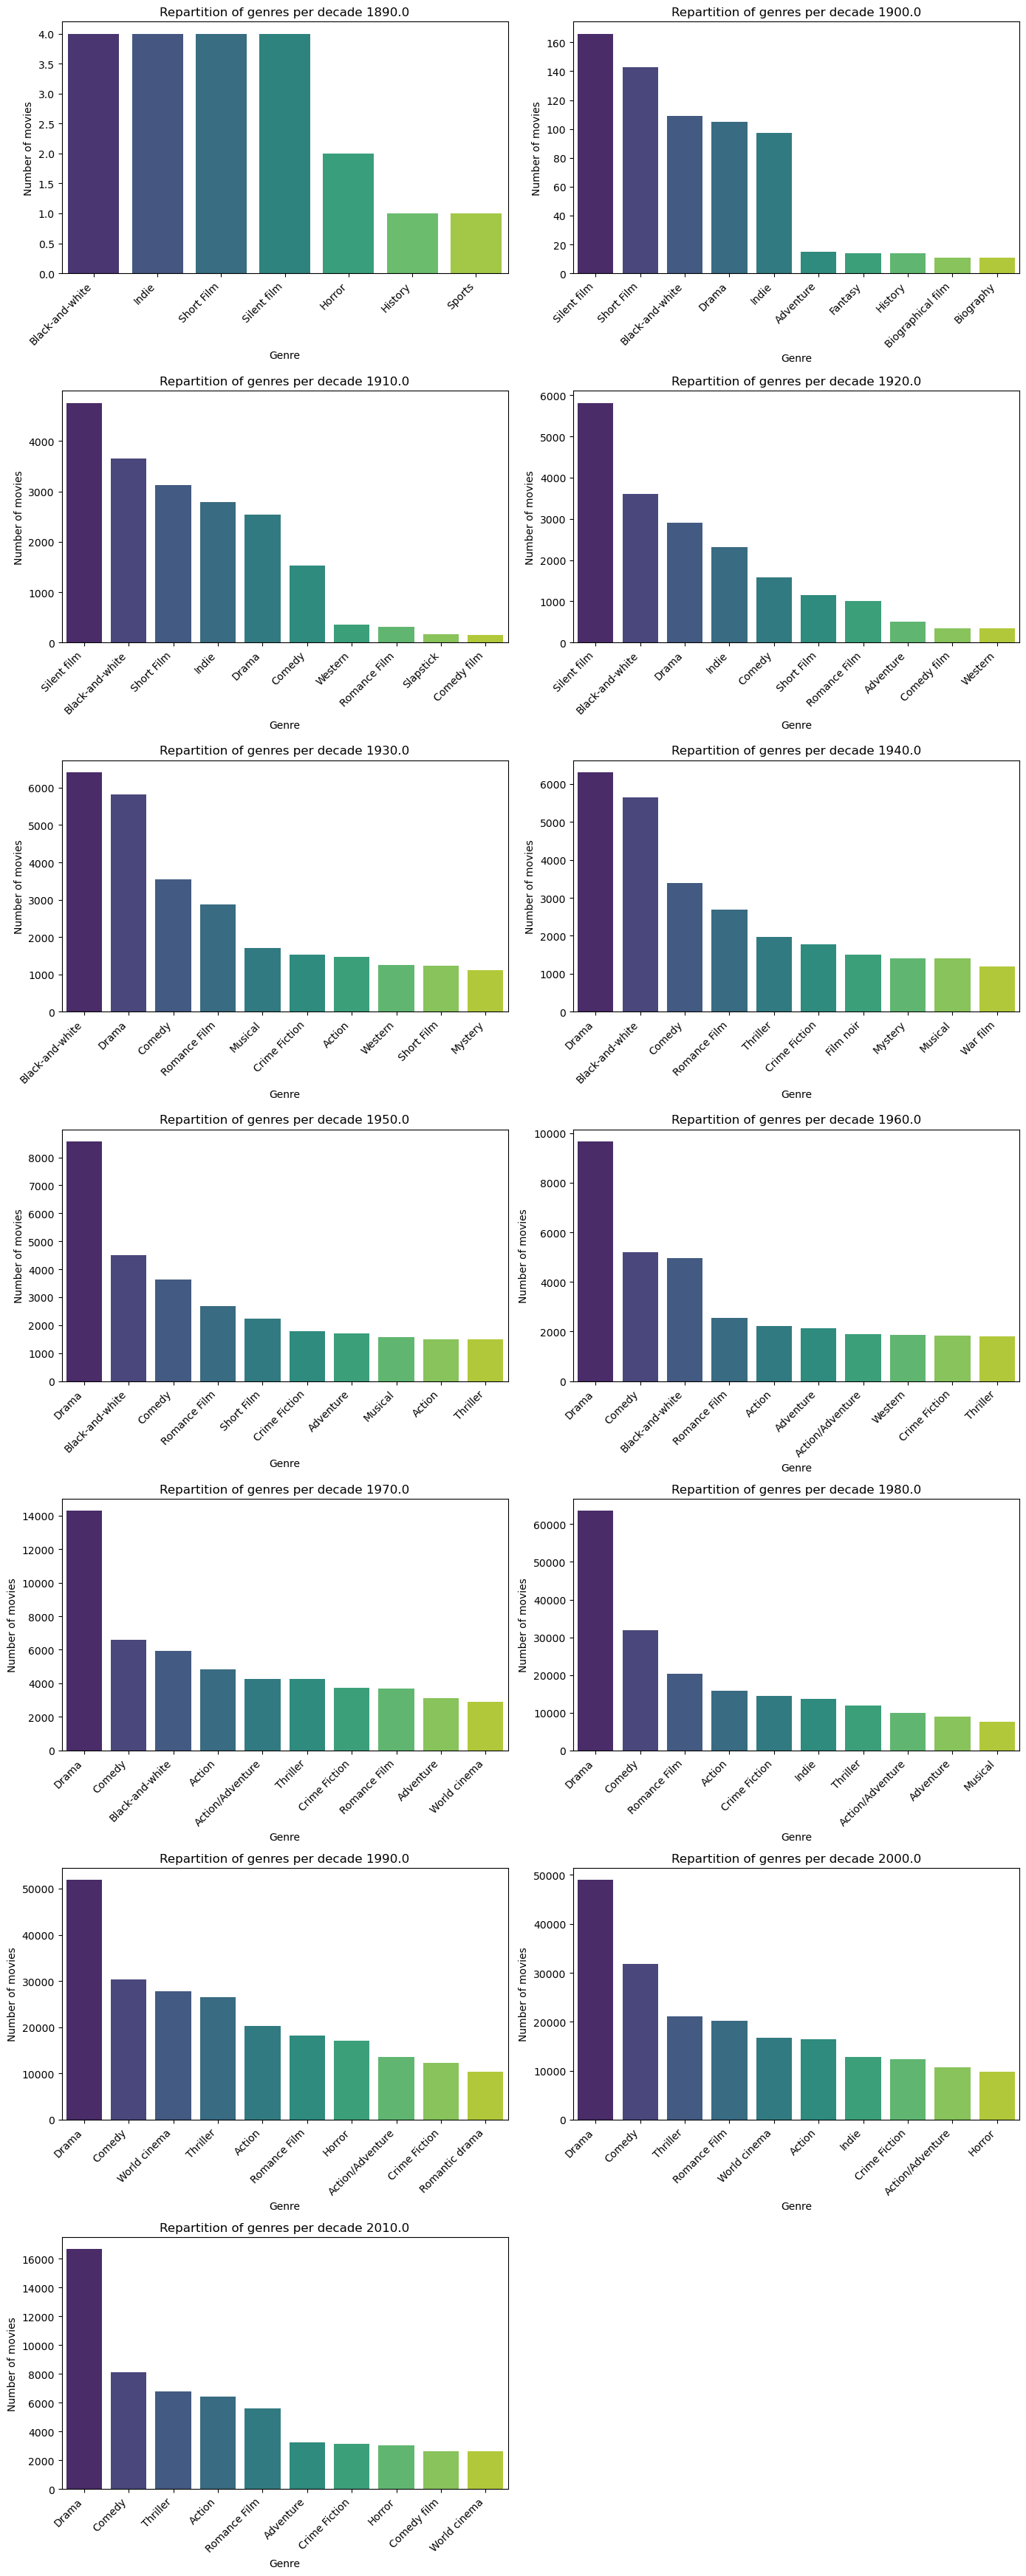

In [24]:
# Combining all genres in a single list
all_genres = [genre for sublist in merged_df['genre_list'] for genre in sublist]

# Exploding the genre_list column to transform the genre lists into individual rows
exploded_df = merged_df.explode('genre_list')

# Count the number of movies per genre and per decade
genre_counts_by_decade = exploded_df.groupby(['Decade', 'genre_list']).size().reset_index(name='count')

# Select the 10 most frequent genres for each decade
top_genres_by_decade = genre_counts_by_decade.groupby('Decade').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Initialize the list of decades
decades = top_genres_by_decade['Decade'].unique()

# Calculate the number of subplots needed
num_decades = len(decades)
num_rows = (num_decades + 1) // 2  # Number of rows needed for two columns

# Creation of a figure with the correct number of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Display the repartition of genres for each decade
for ax, decade in zip(axes.flatten(), decades):
    data_decade = top_genres_by_decade[top_genres_by_decade['Decade'] == decade]
    sns.barplot(data=data_decade, x='genre_list', y='count', ax=ax, hue='genre_list', palette='viridis', legend=False,  dodge=False)
    ax.set_title(f'Repartition of genres per decade {decade}')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Number of movies')
    ax.set_xticks(range(len(data_decade['genre_list'])))
    ax.set_xticklabels(data_decade['genre_list'], rotation=45, ha='right')
# Supprimer les axes vides si le nombre de décennies est impair
if num_decades % 2 != 0:
    fig.delaxes(axes.flatten()[-1])
# Ajuster la mise en page
plt.tight_layout()
plt.show()

In [25]:
# Creation of a dynimic graph with a timeline
fig = px.bar(top_genres_by_decade, x='genre_list', y='count', color='genre_list', 
             animation_frame='Decade', 
             labels={'count': 'Number of movies', 'genre_list': 'Genre'},
             title='Evolution of the most common genres per decade')

# Adjust the layout to slow down the animation
fig.update_layout(
    xaxis_tickangle=-45,
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 2000, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 2000}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Adding the timeline
fig.update_layout(
    sliders=[{
        'steps': [
            {
                'args': [[str(decade)], {'frame': {'duration': 2000, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 2000}}],
                'label': str(decade),
                'method': 'animate'
            } for decade in top_genres_by_decade['Decade'].unique()
        ],
        'transition': {'duration': 2000},
        'x': 0.1,
        'len': 0.9,
        'xanchor': 'left',
        'y': -0.1,
        'currentvalue': {
            'font': {'size': 20},
            'prefix': 'Decade:',
            'visible': True,
            'xanchor': 'right'
        },
        'tickcolor': 'white'
    }]
)

fig.show()

In [26]:
# Filter the data to keep only the most common genres
filtered_df = exploded_df[exploded_df['genre_list'].isin(top_genres_by_decade['genre_list'])]

# Compute the number of occurrences of each genre and gender of actor per decade
gender_genre_counts_by_decade = filtered_df.groupby(['Decade', 'genre_list', 'Actor_gender']).size().reset_index(name='count')

# Createion of a dynamic graph with a timeline
fig = px.bar(gender_genre_counts_by_decade, x='genre_list', y='count', color='Actor_gender', 
             animation_frame='Decade', 
             labels={'count': 'Number of movies', 'genre_list': 'Genre', 'Actor_gender': 'Genre of the actor'},
             title='Proportion of men and women per genre per decade')

# Adjust the layout to slow down the animation
fig.update_layout(
    xaxis_tickangle=-45,
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 2000, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 2000}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Adding the timeline
fig.update_layout(
    sliders=[{
        'steps': [
            {
                'args': [[str(decade)], {'frame': {'duration': 2000, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 2000}}],
                'label': str(decade),
                'method': 'animate'
            } for decade in gender_genre_counts_by_decade['Decade'].unique()
        ],
        'transition': {'duration': 2000},
        'x': 0.1,
        'len': 0.9,
        'xanchor': 'left',
        'y': -0.1,
        'currentvalue': {
            'font': {'size': 20},
            'prefix': 'Decade:',
            'visible': True,
            'xanchor': 'right'
        },
        'tickcolor': 'white'
    }]
)

fig.show()

> The genres clearly evolve over time and over the decades. This should also be taken into account in our analysis, because the appearance of a new genre may or may not be linked to the appearance of new characters. It's also interesting to see how genres interact with each other, especially as most films are combinations of genres. To better visualise this, we decided to use co-occurrence heatmaps.

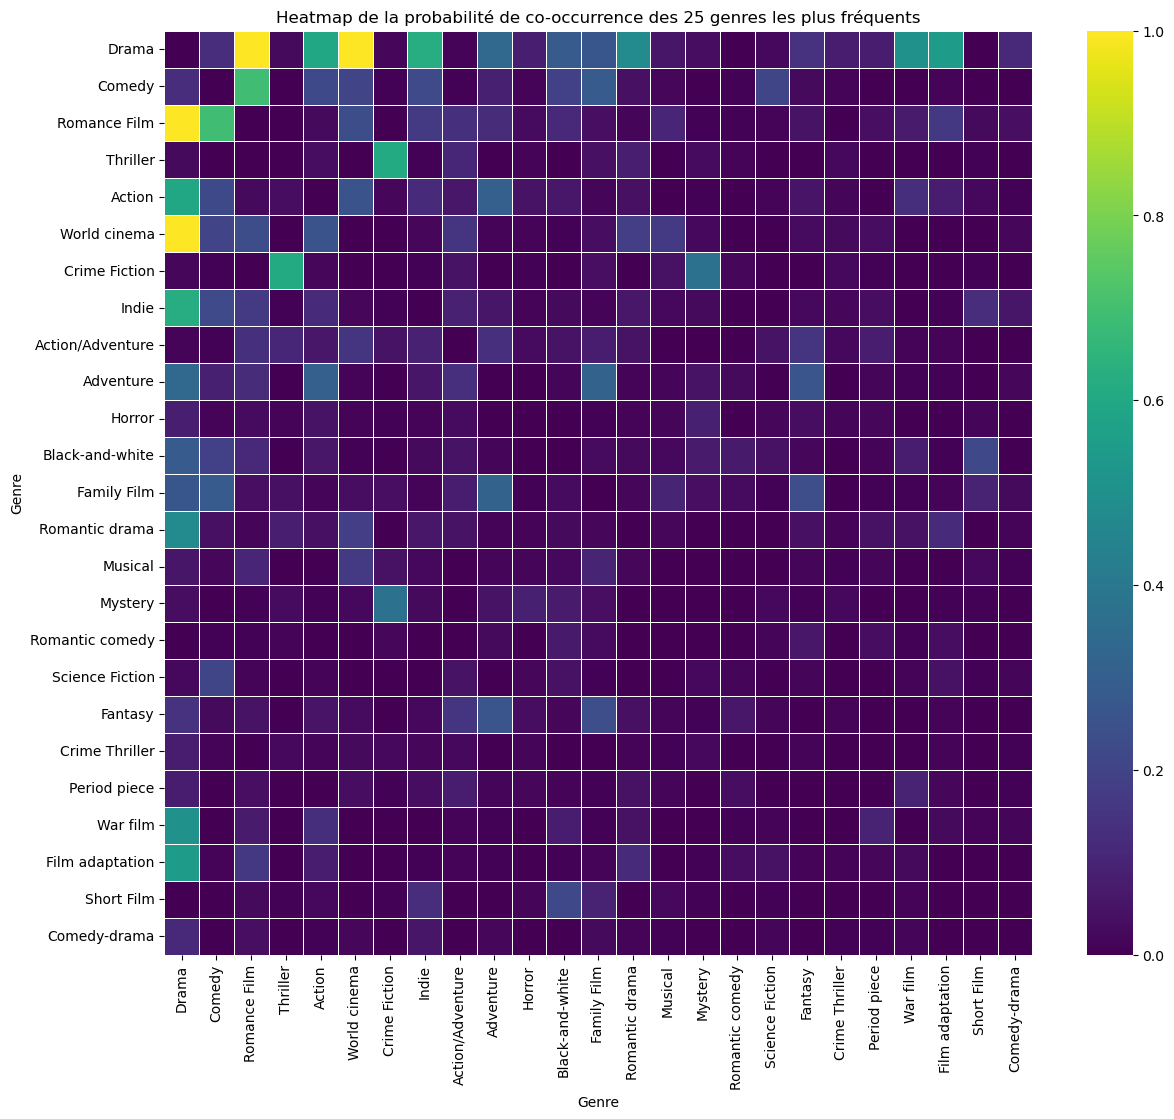

In [27]:
# Calculer les occurrences de chaque genre
all_genres = [genre for sublist in merged_df['genre_list'] for genre in sublist]
genre_counts = Counter(all_genres)

# Sélectionner les 25 genres les plus fréquents
top_25_genres = [genre for genre, count in genre_counts.most_common(25)]

# Filtrer les données pour ne garder que les 25 genres les plus fréquents
filtered_df = merged_df[merged_df['genre_list'].apply(lambda x: any(genre in top_25_genres for genre in x))]

# Calculer les co-occurrences des genres
genre_combinations = []
for genres in filtered_df['genre_list']:
    genre_combinations.extend(combinations([genre for genre in genres if genre in top_25_genres], 2))

# Compter les co-occurrences des genres
co_occurrence_counts = Counter(genre_combinations)

# Créer une DataFrame pour la matrice de co-occurrence
co_occurrence_matrix = pd.DataFrame(0, index=top_25_genres, columns=top_25_genres)

# Remplir la matrice de co-occurrence
for (genre1, genre2), count in co_occurrence_counts.items():
    co_occurrence_matrix.at[genre1, genre2] = count
    co_occurrence_matrix.at[genre2, genre1] = count

# Normaliser les données pour mieux visualiser les co-occurrences
co_occurrence_matrix_normalized = co_occurrence_matrix / co_occurrence_matrix.max().max()

# Créer la heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(co_occurrence_matrix_normalized, annot=False, cmap='viridis', linewidths=.5)
plt.title('Heatmap de la probabilité de co-occurrence des 25 genres les plus fréquents')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

### *1.3.4 Ethnicity proportion*

> The ethnicity of actors can also be an interesting indicator of character, even if it remains an indirect indicator. Unfortunately, more than 75% of the database does not specify the actor's ethnicity. We therefore prefer not to use this parameter in our analysis for lack of data.

In [28]:
# Count the number of movies without data in Actor_age_at_movie_release
actors_without_etnicity = merged_df['Actor_ethnicity'].isna().sum()
print(f"Number of films without data in Actor_age_at_movie_release : {actors_without_etnicity} which corresponds to {round(actors_without_etnicity/len(merged_df)*100, 2)}% of dataset")

Number of films without data in Actor_age_at_movie_release : 344611 which corresponds to 76.47% of dataset


## *1.4 Conclusion*

A compléter

# 2. Timline extraction

# 3. Testing methods 

# 4. Feasibility with two examples

# 5. Conclusion and projection for the P3 milestone